C:\Users\Seba\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
I:\Anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] No se encontró el proceso especificado'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
I:\Anaconda\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


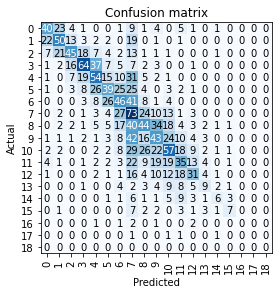

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 25 05:09:54 2024

@author: Seba
"""

from fastai.vision.all import *

path = Path("G:\ExtensionChrome\wewewe_model\growdiaries")


def get_label_func(item):
    # Assuming your structure is like 'path/to/data/plant_type/week/user/image.jpg'
    week = item.parent.parent.name  # Exclude the user folder
    return int(week)

plantas = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=get_label_func,
    item_tfms=Resize(250)
    )


dls = plantas.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [27]:
from PIL import Image
foto = Image.open(r"G:\ExtensionChrome\wewewe_model\fotos/autoflowering-lemon-og-haze.jpg")
semana ,_,_ = learn.predict(r"G:\ExtensionChrome\wewewe_model\test/man4.jpg")
print(semana)

8


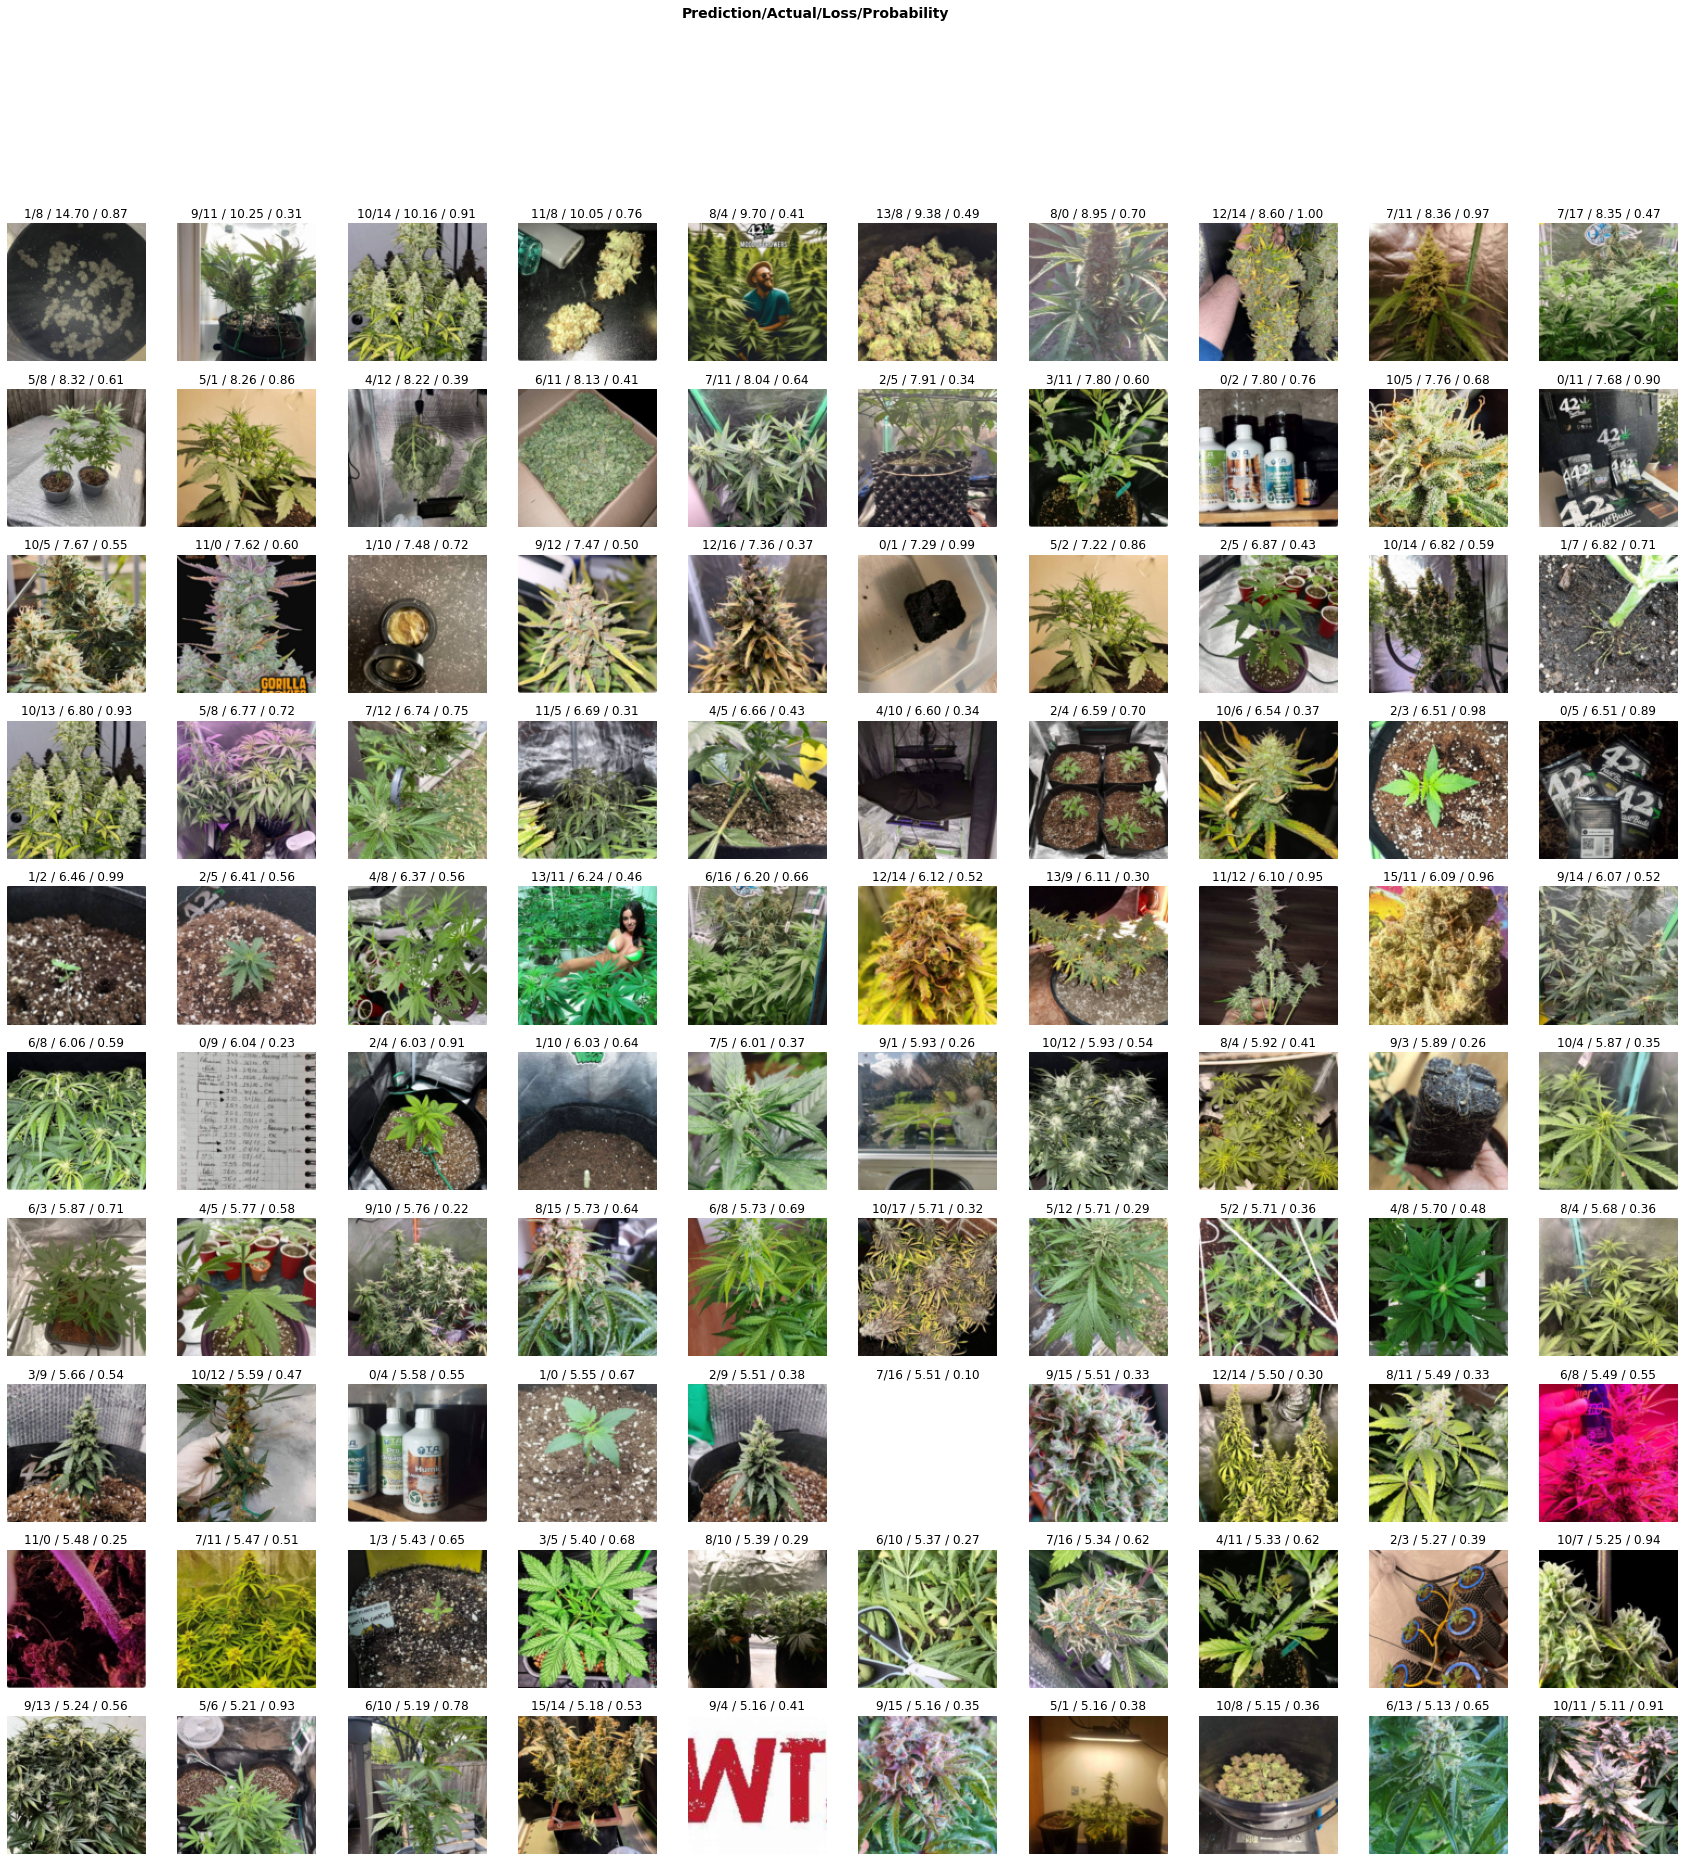

In [22]:
interp.plot_top_losses(100, nrows=10)

In [7]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)

NameError: name 'learn' is not defined